In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
pd.options.display.max_columns = 5
pd.options.display.max_rows = 5

In [3]:
train_df=pd.read_csv("../train.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train_df.sample(5)

,id,label,tweet
21565,21566,0,play date ð #cute #family #love #playtime
11823,11824,0,@user @user @user so all these little pundi...
21120,21121,0,direction bac2 ! #educspe #educateurspecialise...
20320,20321,0,this one i captured downtown #nice #fra #stree...
30915,30916,0,i need to wait for my hair to grow longer befo...


In [7]:
train_df.drop('id',axis=1,inplace=True)

In [8]:
train_df.sample(5)

,label,tweet
12288,0,#teamhawthorn are ready for our live link up w...
12009,0,some come coaches have turned satellite camps ...
4092,0,@user introduction to #msqrd. #lol #dev #ad...
31061,0,i am so excited for resident evil 7. it looks ...
18523,0,"new #trending #gif on @user , hbo, monday, fr..."


In [9]:
print(train_df["tweet"].iloc[0],"\n")
print(train_df["tweet"].iloc[1],"\n")
print(train_df["tweet"].iloc[2],"\n")
print(train_df["tweet"].iloc[4],"\n")
print(train_df["tweet"].iloc[21],"\n")


 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

 factsguide: society now    #motivation 

sad little dude..   #badday #coneofshame #cats #pissed #funny #laughs  



In [10]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

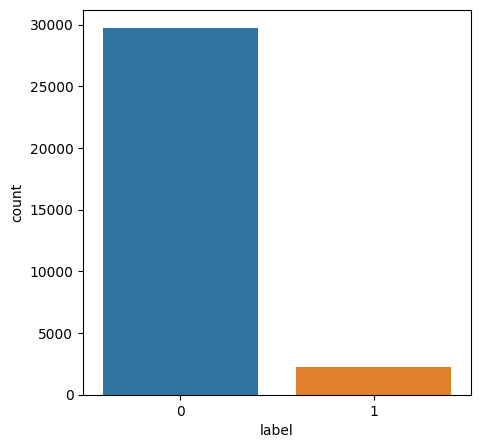

In [11]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = train_df)

In [12]:
#missing values
train_df.isnull().sum()

label    0
tweet    0
dtype: int64

<AxesSubplot: >

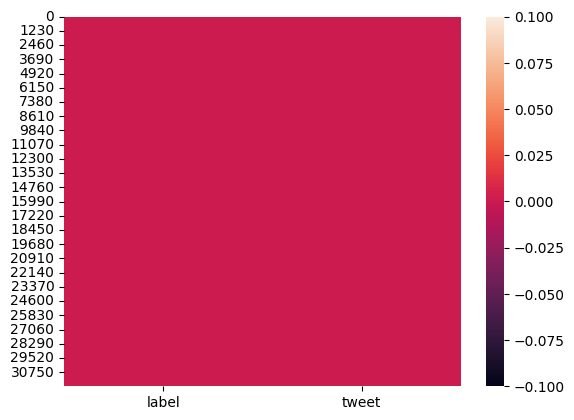

In [13]:
sns.heatmap(train_df.isnull())

In [14]:
train_df_cat=train_df["tweet"]
train_df_cat

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
                               ...                        
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [15]:
train_df_dummy=pd.get_dummies(train_df_cat,drop_first=True)

In [16]:
train_df_dummy.head(2)

,what you conjure up a smile today?,"#90th bihday to #her #majesty the #queen, queen elizabeth",...,ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #graduated ! imma #proud #momma #jurk ó¾¬ #throwback #tuesday to #family...,ó¾­© duchess ó¾ roxie sinesh ó¾­© â½ #suppo #oil #gas #jobs â½ ó¾¬ó¾¬ #single #mothers ó¾¬ó¾¬ ó¾¬ó¾¬ #fathers...
0,0,0,...,0,0
1,0,0,...,0,0


In [17]:
type(train_df_dummy)

pandas.core.frame.DataFrame

In [18]:
X=train_df_dummy
y=train_df["label"]


In [19]:
X.head()

,what you conjure up a smile today?,"#90th bihday to #her #majesty the #queen, queen elizabeth",...,ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #graduated ! imma #proud #momma #jurk ó¾¬ #throwback #tuesday to #family...,ó¾­© duchess ó¾ roxie sinesh ó¾­© â½ #suppo #oil #gas #jobs â½ ó¾¬ó¾¬ #single #mothers ó¾¬ó¾¬ ó¾¬ó¾¬ #fathers...
0,0,0,...,0,0
1,0,0,...,0,0
2,0,0,...,0,0
3,0,0,...,0,0
4,0,0,...,0,0


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (25569, 29529)
Size of y_train: (25569,)
Size of x_test:  (6393, 29529)
Size of y_test:  (6393,)


In [23]:
'''
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))
'''

'\nlogreg = LogisticRegression()\nlogreg.fit(x_train, y_train)\nlogreg_predict = logreg.predict(x_test)\nlogreg_acc = accuracy_score(logreg_predict, y_test)\nprint("Test accuarcy: {:.2f}%".format(logreg_acc*100))\n'

In [24]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_error", alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(x_train, y_train) #Training, SGD, Get optimal parameters

SGDRegressor(alpha=0.1)